In [27]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm
test = False


df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\excel dev.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
# normalizovat dataframe 
#df=(df-df.min())/(df.max()-df.min())

import time
models = []
rmse_list = []
predictions = []
for i in range(1,7):
    timeout = time.time() + 1
    best_rmse = 100000000000
    iteration = 0

    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
    cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
    zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
    #
    X = df[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    
    Y = df[['aktivni']]
    
    iteration +=1
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
    #TODO training dataframe bez randomizace
    #TODO testing dataframe bey randomizace
    
    #fit OLS reresi na vsech datech
    model = sm.OLS(Y,X).fit()
    
    print(model.summary())
    
    if test:
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            model = model
        print(len(models))
        print(f"Mean absolute error: {mae:.2f}")
        print(f"Mean squared error: {mse:.2f}")
        print(f"Root mean squared error: {rmse:.2f}")
        rmse_list.append(rmse)
    
    models.append(model)
    print(models)


                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              424.9
Date:                Thu, 02 Mar 2023   Prob (F-statistic):                    9.28e-42
Time:                        11:29:23   Log-Likelihood:                         -599.00
No. Observations:                  83   AIC:                                      1286.
Df Residuals:                      39   BIC:                                      1392.
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [28]:
# Ulozit model
#ulozit model
import pickle
i=1
for model in models:
    filename = f'finalized_model_longtermdev_{i}.sav'
    pickle.dump(model, open(filename, 'wb'))
    #ulozit rmse pro modely
    with open('rmse.pkl', 'wb') as file:
        pickle.dump(rmse_list, file)
    i +=1

predikce

   index   datum  predikce
0     97  202303      7608
1     98  202304      6927
2     99  202305      6778
3    100  202306      6696
4    101  202307      6203
5    102  202308      5955


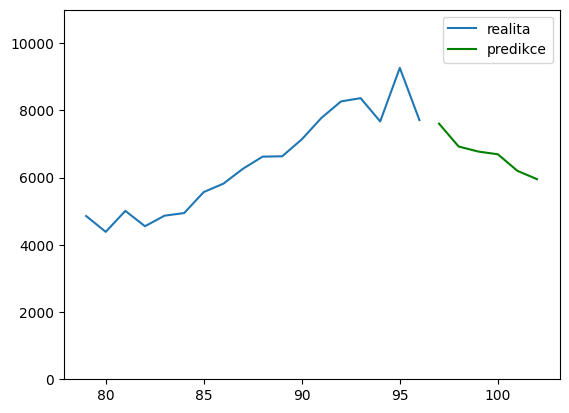

In [29]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
#df = (df-df.min())/(df.max()-df.min())

# definovat listy promenejch
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']

# nacist nejlepsi model
models = []
for i in range(1,7):
    filename = fr'C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\finalized_model_longtermdev_{i}.sav'
    model = pickle.load(open(filename, 'rb'))
    models.append(model)

#nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)

predictions = []
for i in range(1,7):
    # vybrat spravny x promeny
    x_new = df.drop(df.index[:-12])
    x_new = x_new[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    # vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])

    # vybrat spravnej model
    model = models[i-1]
    #predikce na novych datech
    y_new_pred = model.predict(x_new)
    #print(f"{x_new[['datum']]} : {str(y_new_pred)[2:-2]}\n")

    if test:
        # vytvorit dict pro predikce
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": x_new["datum"].values[0],
                    "predikce": int(y_new_pred[0]),
                    "rmse" : str(rmse_values[i-1])[:5],
                    "min": y_new_pred[0] - rmse_values[i-1],
                    "max": y_new_pred[0] + rmse_values[i-1]}
    else:
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": x_new["datum"].values[0],
                    "predikce": int(y_new_pred.values[0])}
    
    # pridat predikce do dictu
    predictions.append(prediction)

# dataframe z predikce dictu
df_predictions = pd.DataFrame(predictions)
print(df_predictions)

#graf
#definovat realna data 
X_graf = df[["datum"]]
Y_graf = df[['aktivni']]
if test:
    plt.plot(df_predictions['index'], df_predictions['max'], color='red', label="max")
    plt.plot(df_predictions['index'], df_predictions['min'], color="orange", label="min")
    
plt.plot(X_graf.index[-30:].values,Y_graf[-30:], label='realita')
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")
# zobrazuje graf od 0 na ose y
plt.ylim(0, 11000)
plt.legend()
plt.show()